In [4]:
# Imports & Settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use(style='ggplot')
from matplotlib import rcParams
rcParams['figure.figsize'] = (16,9)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
# Data

df = pd.read_csv('movies.csv')

In [14]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# Remove nulls

df = df.dropna()

In [7]:
# Changing data type

df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [36]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [8]:
# Follow released year, drop year

df = df.drop('year', axis=1)
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [9]:
df['year'] = df['released'].str.extract(pat='([0-9]{4})').astype('int64')

In [46]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [10]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


Text(0, 0.5, 'Gross')

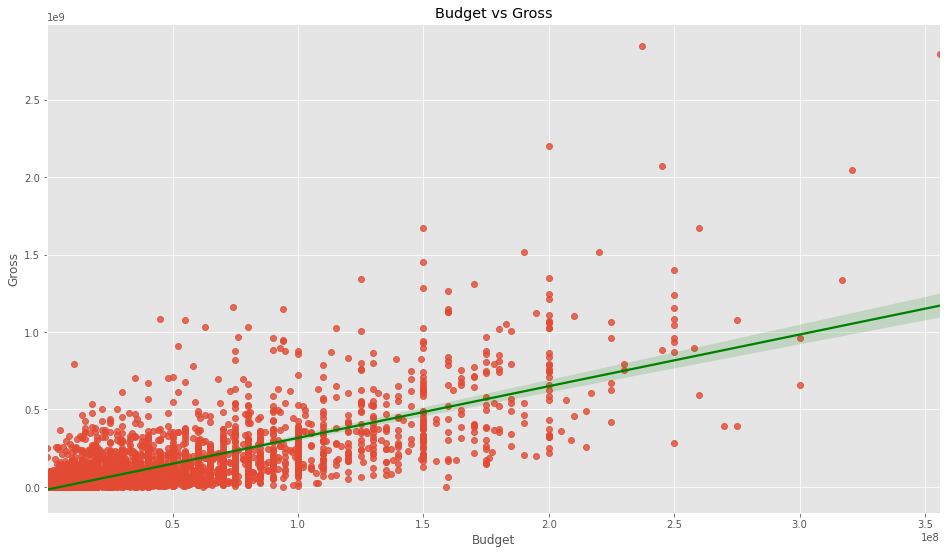

In [11]:
sns.regplot(x=df['budget'], y=df['gross'], line_kws={"color": "green"})
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

In [26]:
print('Pearson')
print(df.corr(method='pearson'))
print('-'*30)
print('Kendall')
print(df.corr(method='kendall'))
print('-'*30)
print('Spearman')
print(df.corr(method='spearman'))
print('-'*30)

Pearson
              name    rating     genre  released     score     votes  director    writer      star   country    budget     gross   company   runtime      year
name      1.000000 -0.029234  0.010996 -0.006152  0.014450  0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392  0.005639  0.021697  0.010850  0.025542
rating   -0.029234  1.000000  0.147796  0.018083  0.065983  0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946 -0.181906 -0.092357  0.140792  0.022021
genre     0.010996  0.147796  1.000000  0.022142  0.035106 -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523 -0.244101 -0.071334 -0.059237 -0.069147
released -0.006152  0.018083  0.022142  1.000000  0.045874  0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952  0.008501 -0.002407  0.008975 -0.005989
score     0.014450  0.065983  0.035106  0.045874  1.000000  0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001  0.222556  0.020656  0.414068  0.061923
votes     0.012615  0.006031 -0.135990

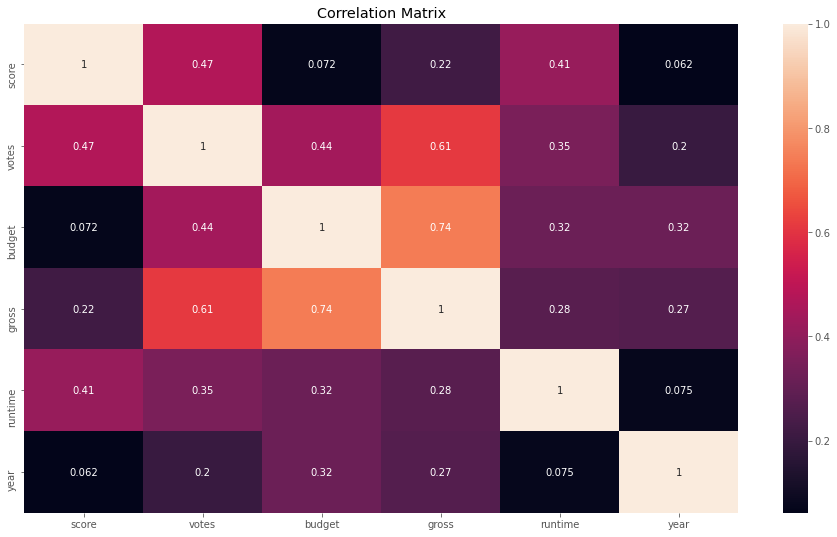

In [18]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [21]:
ided_df = df

for col in ided_df:
    if (ided_df[col].dtype == 'object'):
        ided_df[col] = ided_df[col].astype('category')
        ided_df[col] = ided_df[col].cat.codes

ided_df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,4692,6,6,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0,2020
7649,3556,4,0,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0,2020
7650,1153,4,1,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0,2020
7651,3978,4,1,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0,2020


In [23]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,4692,6,6,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980


              name    rating     genre  released     score     votes  director    writer      star   country    budget     gross   company   runtime      year
name      1.000000 -0.029234  0.010996 -0.006152  0.014450  0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392  0.005639  0.021697  0.010850  0.025542
rating   -0.029234  1.000000  0.147796  0.018083  0.065983  0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946 -0.181906 -0.092357  0.140792  0.022021
genre     0.010996  0.147796  1.000000  0.022142  0.035106 -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523 -0.244101 -0.071334 -0.059237 -0.069147
released -0.006152  0.018083  0.022142  1.000000  0.045874  0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952  0.008501 -0.002407  0.008975 -0.005989
score     0.014450  0.065983  0.035106  0.045874  1.000000  0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001  0.222556  0.020656  0.414068  0.061923
votes     0.012615  0.006031 -0.135990  0.0288

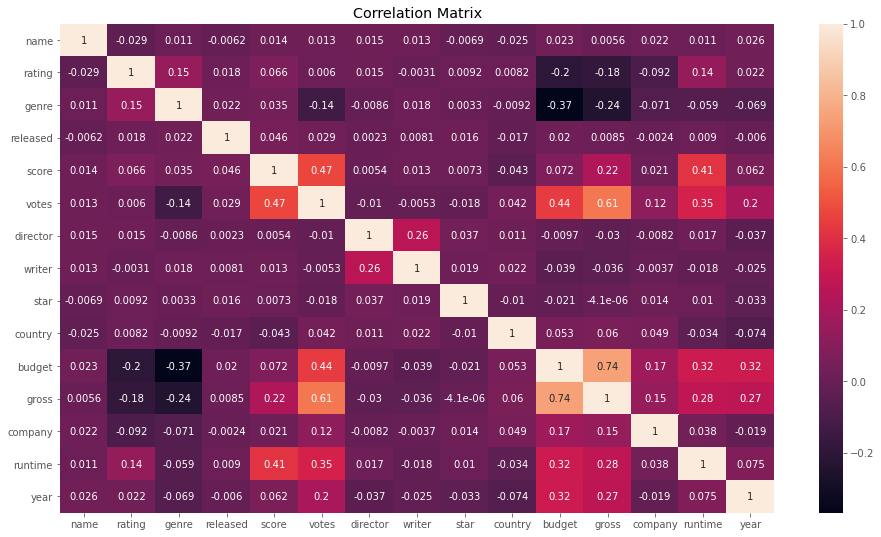

In [28]:
print(df.corr(method='pearson'))
print('-'*30)
correlation_matrix = df.corr(method='pearson')
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [40]:
sorted_corr = df.corr(method='pearson').unstack().sort_values(ascending=False)
sorted_corr[sorted_corr.between(0.5, 0.99)]

gross   budget    0.740247
budget  gross     0.740247
gross   votes     0.614751
votes   gross     0.614751
dtype: float64

## Conclusion

Gross (or box office), loosely meaning how successful the movie was in terms of its viewership and sales, only shows high correlation with the movie's budgets and the number of IMDB user  votes. Initially, I had assumptions towards how big directors, like Christopher Nolan, or companies, like Warner Bros., would have an impact on the success of a movie and it seems like it wasn't the case. It also appears that commercial success did not necessarily mean that the score (IMDB rating) of the movie was any good.

### Key Takeaways

* Budget & Gross have highest correlation at 0.740247. A movie with a higher budget, likely some of which was marketing, provided the movie with a better turnout rate and thus generally resulted in higher gross revenue.
* Spend more on the production of the movie and expect a bigger return on investment.
* Factors like the writer, production company, director, or genre had essentially no effect on how the movie would perform. 
* Unsurprisingly, there is a slight correlation between the amount of votes and the score. Generally, users who would take the time to vote on a movie would either have really enjoyed it or disliked it so much to the point where they felt the need to rate it poorly.
* Score (the IMDB user rating) was not influenced by the commercial success of the movie.

